<a href="https://colab.research.google.com/github/renan-peres/mfin-python-restaurant-data-analysis/blob/main/restaurant-data-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Restaurant Data Analysis**
![Restaurant Analysis Introduction](https://github.com/renan-peres/mfin-python-restaurant-data-analysis/blob/main/images/intro.jpeg?raw=1)

This is a project developed by Team 5 for the **Python for Data Analysts: Methods & Tools - DAT-7466 - BMFIN1** Course (Spring 2025) at Hult International business School -- led by Professor [Michael de la Maza](https://www.linkedin.com/in/michaeldelamaza/).

### **Team 5**
- [Daniela Salgari](https://www.linkedin.com/in/daniela-salgar/)
- [Alessandro Frullani](https://www.linkedin.com/in/alessandro-frullani-8526b4132/)
- [Gianmaria Betta](https://www.linkedin.com/in/gianmariabetta/)
- [Marco Primatesta](https://www.linkedin.com/in/marco-primatesta/)
- [Renan Peres](https://www.linkedin.com/in/renanperes/)

### **Contents**
- [Prepare Environmnet](restaurant-data-analysis.ipynb#prepare-environment)
- [Download & Import Data](#download--import-datasets)
- [Exploratory Data Analysis (EDA)](#data-cleaning)
- [Data Cleaning & Transformation](#data-cleaning)
- [Data Analysis & Visualization](#data-analysis--visualization)
  - [Orders](#data-analysis--visualization)
  - [Items](#data-analysis--visualization)
  - [Order Type](#data-analysis--visualization)
- [Insights & Recommendations](#insights--recommendations)
  - [Where should the new restaurant be located?](#data-analysis--visualization)
  - [What type of restaurant should it be?](#data-analysis--visualization)
  - [Which items should be included in the new restaurant?](#data-analysis--visualization)

## **Prepare Environment**

Have a jupyter environment ready, and `pip install` these libraries:


In [1]:
!pip install -q gdown -q highcharts-core
import gdown # Google Drive Connector
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict
import plotly.express as px
import plotly.graph_objects as go
from highcharts_core.chart import Chart
import numpy as np
import os

import warnings
from IPython.display import HTML
import IPython

# Suppress FutureWarning and FormatterWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=IPython.core.formatters.FormatterWarning)

## **Download & Import Datasets**
The datasets used in this report was retrieved from following directory: https://drive.google.com/drive/folders/1GtIfSS0K3wyBkOPD0jOy7V8fIXW3JEfj

In [2]:
# Define the directory URL
directory_url = 'https://drive.google.com/drive/folders/1GtIfSS0K3wyBkOPD0jOy7V8fIXW3JEfj'

# Try to download files first, if fails, use local path
try:
    # Attempt to download all files within the directory
    gdown.download_folder(url=directory_url, quiet=False, use_cookies=False)
    base_path = '/content/Student Data/Copy of'
except Exception as e:
    print(f"Failed to download files: {e}")
    print("Using local path instead...")
    base_path = '/content'

# Dictionary of file paths and their corresponding dataframe names
files = {
    'items.pickle': 'df_items',
    'restaurants.pickle': 'df_restaurants',
    'orders.pickle': 'df_orders',
    'orders_7.pickle': 'df_orders_7',
    'students.pickle': 'df_students',
    'summarized_orders.pickle': 'df_summarized_orders'
}

# Load pickle files
for file, df_name in files.items():
    try:
        if base_path == '/content/Student Data/Copy of':
            globals()[df_name] = pd.read_pickle(f'{base_path} {file}')
        else:
            globals()[df_name] = pd.read_pickle(f'{base_path}/{file}')
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Load Excel file separately since it has different extension
try:
    if base_path == '/content/Student Data/Copy of':
        df_university = pd.read_excel(f'{base_path} university.xlsx')
    else:
        df_university = pd.read_excel(f'{base_path}/university.xlsx')
except Exception as e:
    print(f"Error loading university.xlsx: {e}")

Retrieving folder contents


Processing file 1q0l9opeh5hobEMv8eh24EmdZqq02WvVN Copy of items.pickle
Processing file 1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ Copy of orders_7.pickle
Processing file 1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc Copy of orders.pickle
Processing file 1FK6K6lSHclQIGHWjPOj1snGNMGkdUa0y Copy of restaurants.pickle
Processing file 1w0F1pk7c713iaXssleLg3vQopAT2m1Yk Copy of students.pickle
Processing file 1yE1UizU7kn-O2ZEdULl5lM3BB1vBLaQO Copy of summarized_orders.pickle
Processing file 1EMZkF4_TPp-O5L8lcjLx_8_96L44kCCE Copy of university.xlsx


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1q0l9opeh5hobEMv8eh24EmdZqq02WvVN
To: /content/Student Data/Copy of items.pickle
100%|██████████| 1.75k/1.75k [00:00<00:00, 3.55MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ
From (redirected): https://drive.google.com/uc?id=1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ&confirm=t&uuid=d48d22fe-349b-4319-b5b8-128fdf07a744
To: /content/Student Data/Copy of orders_7.pickle
100%|██████████| 236M/236M [00:02<00:00, 95.3MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc
From (redirected): https://drive.google.com/uc?id=1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc&confirm=t&uuid=1b2f817a-eca5-4fb8-ba96-2df4cd896618
To: /content/Student Data/Copy of orders.pickle
100%|██████████| 156M/156M [00:01<00:00, 144MB/s]
Downloading...
From: https://drive.google.co

## **Exploratory Data Analysis (EDA)**

### Profile Initial Data

In [3]:
def profile_table(table_name: str, df: pd.DataFrame) -> Tuple[str, int, int, int, int, List[str], Dict[str, float], List[str]]:
    print(f"\n{'='*80}\nStarting to process table: {table_name}\n{'='*80}")

    # Calculate metrics and gather information
    total_rows = df.shape[0]
    total_columns = df.shape[1]
    null_rows = df.isnull().any(axis=1).sum()
    duplicate_rows = df.duplicated().sum()

    # Return the gathered information as a tuple
    return table_name, total_rows, total_columns, null_rows, duplicate_rows

# List of your DataFrames
dataframes = [df_items, df_restaurants, df_orders, df_orders_7, df_students, df_summarized_orders, df_university]
dataframe_names = ['df_items', 'df_restaurants', 'df_orders', 'df_orders_7', 'df_students', 'df_summarized_orders', 'df_university']

# Create an empty list to store the results
results = []

# Loop through all tables and profile them
for i, df in enumerate(dataframes):
    result = profile_table(dataframe_names[i], df)
    results.append(result)
    print(f"Completed processing table: {dataframe_names[i]}")
    print("---\n")

# Create a DataFrame from the results
result_df = pd.DataFrame({
    "table_name": [r[0] for r in results],
    "total_rows": [r[1] for r in results],
    "total_columns": [r[2] for r in results],
    "null_rows": [r[3] for r in results],
    "duplicate_rows": [r[4] for r in results]
})

# Display the results
display(result_df)


Starting to process table: df_items
Completed processing table: df_items
---


Starting to process table: df_restaurants
Completed processing table: df_restaurants
---


Starting to process table: df_orders
Completed processing table: df_orders
---


Starting to process table: df_orders_7
Completed processing table: df_orders_7
---


Starting to process table: df_students
Completed processing table: df_students
---


Starting to process table: df_summarized_orders
Completed processing table: df_summarized_orders
---


Starting to process table: df_university
Completed processing table: df_university
---



,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2387224,10,111585,0
3,df_orders_7,2387224,15,111585,0
4,df_students,9,7,5,0
5,df_summarized_orders,2806,4,0,0
6,df_university,4,4,0,0


### Inspect Data Types

In [4]:
def get_dataframe_info(dataframes, dataframe_names):
  """
  Gets column names and data types for multiple dataframes.

  Args:
      dataframes: A list of pandas DataFrames.
      dataframe_names: A list of strings, where each string is the name of the corresponding DataFrame.

  Returns:
      A pandas DataFrame containing the dataframe name, column name, and data type.
  """

  all_info = []
  for df, name in zip(dataframes, dataframe_names):
    if isinstance(df, pd.DataFrame):  # Check if it's actually a DataFrame
      for col in df.columns:
        all_info.append([name, col, df[col].dtype])
    else:
      print(f"Warning: {name} is not a DataFrame. Skipping...")

  return pd.DataFrame(all_info, columns=["dataframe", "column_name", "type"])

# Example usage (replace with your actual dataframes and names)
dataframes = [df_items, df_restaurants, df_orders, df_orders_7, df_students, df_summarized_orders, df_university]
dataframe_names = ['df_items', 'df_restaurants', 'df_orders', 'df_orders_7', 'df_students', 'df_summarized_orders', 'df_university']

# Display the results
get_dataframe_info(dataframes, dataframe_names)

,dataframe,column_name,type
0,df_items,ITEM_ID,object
1,df_items,ITEM_NAME,object
2,df_items,ITEM_TYPE,object
3,df_restaurants,RESTAURANT_ID,object
4,df_restaurants,NAME,object
5,df_restaurants,ADDRESS,object
6,df_restaurants,LAT,float64
7,df_restaurants,LONG,float64
8,df_restaurants,OPENING_DATE,object
9,df_restaurants,DELIVERY_START,object


## **Data Cleaning & Transformation**

### Drop Null Rows

In [5]:
def clean_dataframes(result_df: pd.DataFrame, dataframe_names: List[str], dataframes: List[pd.DataFrame]) -> None:
    """
    Cleans the dataframes by dropping null rows and null columns based on the profiling results.

    Parameters:
        result_df (pd.DataFrame): The DataFrame containing profiling results.
        dataframe_names (List[str]): List of names corresponding to the DataFrames.
        dataframes (List[pd.DataFrame]): List of DataFrames to be cleaned.
    """
    for i in range(len(dataframes)):
        df_name = dataframe_names[i]
        df = dataframes[i]
        # Get the corresponding row from result_df (same order)
        row = result_df.iloc[i]

        # Drop rows with any null values if there were null rows
        if row['null_rows'] > 0:
            df.dropna(axis=0, how='any', inplace=True)

# Usage after profiling
clean_dataframes(result_df, dataframe_names, dataframes)

# Optionally, reprofile to verify cleaning
results_after_cleaning = []
for i, df in enumerate(dataframes):
    result = profile_table(dataframe_names[i], df)
    results_after_cleaning.append(result)

result_after_clean_df = pd.DataFrame({
    "table_name": [r[0] for r in results_after_cleaning],
    "total_rows": [r[1] for r in results_after_cleaning],
    "total_columns": [r[2] for r in results_after_cleaning],
    "null_rows": [r[3] for r in results_after_cleaning],
    "duplicate_rows": [r[4] for r in results_after_cleaning]
})

display(result_after_clean_df)


Starting to process table: df_items

Starting to process table: df_restaurants

Starting to process table: df_orders

Starting to process table: df_orders_7

Starting to process table: df_students

Starting to process table: df_summarized_orders

Starting to process table: df_university


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2275639,10,0,0
3,df_orders_7,2275639,15,0,0
4,df_students,4,7,0,0
5,df_summarized_orders,2806,4,0,0
6,df_university,4,4,0,0


### Cast Data Types

In [6]:
# Convert 'OPENING_DATE' and 'DELIVERY_START' columns to datetime objects
for df_name in ['df_restaurants']:
    try:
        df = globals()[df_name]
        for col in ['OPENING_DATE', 'DELIVERY_START']:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')  # Use errors='coerce' to handle invalid dates
    except KeyError:
        print(f"DataFrame '{df_name}' or column not found.")
    except Exception as e:
        print(f"An error occurred while converting '{df_name}' column: {e}")

# Display the results
get_dataframe_info(dataframes, dataframe_names)

,dataframe,column_name,type
0,df_items,ITEM_ID,object
1,df_items,ITEM_NAME,object
2,df_items,ITEM_TYPE,object
3,df_restaurants,RESTAURANT_ID,object
4,df_restaurants,NAME,object
5,df_restaurants,ADDRESS,object
6,df_restaurants,LAT,float64
7,df_restaurants,LONG,float64
8,df_restaurants,OPENING_DATE,datetime64[ns]
9,df_restaurants,DELIVERY_START,datetime64[ns]


### Add Date Dimensions

In [7]:
df_orders_7['DATE'] = pd.to_datetime(df_orders_7['DATETIME']).dt.date
df_orders_7['HOUR'] = pd.to_datetime(df_orders_7['DATETIME']).dt.hour
df_orders_7['QUARTER'] = pd.to_datetime(df_orders_7['DATETIME']).dt.quarter
df_orders_7['YEAR'] = pd.to_datetime(df_orders_7['DATETIME']).dt.year

df_orders = df_orders_7
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,DATE,HOUR,QUARTER,YEAR
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,2018-04-21,18,2,2018
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,2018-11-17,12,4,2018
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,2018-11-04,18,4,2018
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,I3,I6,I10,I12,Williamsburg,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar,2018-10-19,19,4,2018
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,I0,I6,I10,I11,Bryant Park,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,2018-04-17,12,2,2018


### Normalize Data (Orders)

In [8]:
# Assuming 'df_orders' is your DataFrame
def normalize_item_column(df):
    """Normalizes 'MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME' into an 'ITEM_NAME'."""

    # Melt the DataFrame to combine the columns into a single column
    df_melted = pd.melt(df,
                        id_vars=df.columns.difference(['MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME']),
                        value_vars=['MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME'],
                        var_name='ITEM_CATEGORY',
                        value_name='ITEM_NAME')

    # Remove rows where 'ITEM_CATEGORY' is NaN
    df_melted = df_melted.dropna(subset=['ITEM_CATEGORY'])

    return df_melted

# Select Only Columns Needed
selected_columns = ['ORDER_ID', 'DATE', 'HOUR', 'QUARTER',	'YEAR', 'TYPE', 'RESTAURANT_NAME', 'MAIN_NAME', 'BASE_NAME', 'SIDE_1_NAME', 'SIDE_2_NAME']
df_orders_norm = df_orders[selected_columns]

# Display the results
df_orders_norm = normalize_item_column(df_orders_norm).sort_values(by='ORDER_ID').reset_index(drop=True)
df_orders_norm.head()

,DATE,HOUR,ORDER_ID,QUARTER,RESTAURANT_NAME,TYPE,YEAR,ITEM_CATEGORY,ITEM_NAME
0,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,SIDE_2_NAME,Charred Broccoli with Lemon
1,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,SIDE_1_NAME,Green Goddess Beans with Sesame
2,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,BASE_NAME,Classic Brown Rice
3,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,MAIN_NAME,Herb Roasted Chicken Marketbowl
4,2018-01-01,10,O1,1,Midtown,IN_STORE,2018,SIDE_2_NAME,Jasper Hill Mac & Cheese


## DataFrames Available for Analysis

In [9]:
# Print the names of all dataframes in the current namespace, excluding those starting with "_" and "dataframe_info"
for var_name in dir():
    if isinstance(globals()[var_name], pd.DataFrame) and not var_name.startswith("_") and var_name != "dataframe_info":
        # Print the variable name if it meets the conditions
        print(f"DataFrame name: {var_name}")
        # Display the top 6 rows of the DataFrame
        display(globals()[var_name].head(6))
        print("-" * 20)  # Print a separator line for clarity

DataFrame name: df


,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01


--------------------
DataFrame name: df_items


,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides
5,I37,Organic Iced Tea,Drinks


--------------------
DataFrame name: df_orders


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,DATE,HOUR,QUARTER,YEAR
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,2018-04-21,18,2,2018
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,2018-11-17,12,4,2018
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,2018-11-04,18,4,2018
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,I3,I6,I10,I12,Williamsburg,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar,2018-10-19,19,4,2018
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,I0,I6,I10,I11,Bryant Park,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,2018-04-17,12,2,2018
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,I3,I7,I15,I10,Midtown,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Roasted Sweet Potatoes,2018-08-24,17,3,2018


--------------------
DataFrame name: df_orders_7


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,DATE,HOUR,QUARTER,YEAR
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,2018-04-21,18,2,2018
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,2018-11-17,12,4,2018
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,2018-11-04,18,4,2018
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,I3,I6,I10,I12,Williamsburg,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar,2018-10-19,19,4,2018
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,I0,I6,I10,I11,Bryant Park,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,2018-04-17,12,2,2018
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,I3,I7,I15,I10,Midtown,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Roasted Sweet Potatoes,2018-08-24,17,3,2018


--------------------
DataFrame name: df_orders_norm


,DATE,HOUR,ORDER_ID,QUARTER,RESTAURANT_NAME,TYPE,YEAR,ITEM_CATEGORY,ITEM_NAME
0,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,SIDE_2_NAME,Charred Broccoli with Lemon
1,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,SIDE_1_NAME,Green Goddess Beans with Sesame
2,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,BASE_NAME,Classic Brown Rice
3,2018-01-01,10,O0,1,Flatiron,IN_STORE,2018,MAIN_NAME,Herb Roasted Chicken Marketbowl
4,2018-01-01,10,O1,1,Midtown,IN_STORE,2018,SIDE_2_NAME,Jasper Hill Mac & Cheese
5,2018-01-01,10,O1,1,Midtown,IN_STORE,2018,MAIN_NAME,Grilled Organic Tofu Marketbowl


--------------------
DataFrame name: df_restaurants


,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01


--------------------
DataFrame name: df_students


,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0
8,Bob,McDonald,1,FL,18,98.0,65.0


--------------------
DataFrame name: df_summarized_orders


,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0
5,Bryant Park,2018-01-08,809,0.0


--------------------
DataFrame name: df_university


,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan


--------------------
DataFrame name: result_after_clean_df


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2275639,10,0,0
3,df_orders_7,2275639,15,0,0
4,df_students,4,7,0,0
5,df_summarized_orders,2806,4,0,0


--------------------
DataFrame name: result_df


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2387224,10,111585,0
3,df_orders_7,2387224,15,111585,0
4,df_students,9,7,5,0
5,df_summarized_orders,2806,4,0,0


--------------------


## **Data Analysis & Visualization**

### Orders

#### Analysis

In [10]:
orders_total = (df_summarized_orders
                     .groupby('DATE')
                     .agg({'NUM_ORDERS': 'sum', 'PERC_DELIVERY': 'mean'})
                     .reset_index())

# Convert 'DATE' column to datetime objects if not already
orders_total['DATE'] = pd.to_datetime(orders_total['DATE'])

# Extract month names and aggregate orders by month
monthly_orders = (orders_total
                 .assign(MONTH_NAME=orders_total['DATE'].dt.strftime('%B'),
                        MONTH_NUM=orders_total['DATE'].dt.month)  # Add month number for sorting
                 .groupby('MONTH_NAME')['NUM_ORDERS']
                 .sum()
                 .reset_index())

# Sort by month number
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_orders['MONTH_NAME'] = pd.Categorical(monthly_orders['MONTH_NAME'],
                                            categories=month_order,
                                            ordered=True)

monthly_orders = monthly_orders.sort_values('MONTH_NAME').reset_index(drop=True)
monthly_orders

,MONTH_NAME,NUM_ORDERS
0,January,201673
1,February,194214
2,March,214441
3,April,205390
4,May,202143
5,June,184290
6,July,172986
7,August,182955
8,September,190523
9,October,214919


In [11]:
orders_restaurant = (df_summarized_orders
                     .sort_values(by=['DATE', 'NUM_ORDERS'], ascending=[True, False])
                     .reset_index(drop=True))

# Convert 'DATE' column to datetime objects
orders_restaurant['DATE'] = pd.to_datetime(orders_restaurant['DATE'])

# Extract month names and aggregate orders by month and restaurant
monthly_restaurant_orders = (orders_restaurant
    .assign(MONTH_NAME=orders_restaurant['DATE'].dt.strftime('%B'))
    .groupby(['MONTH_NAME', 'RESTAURANT_NAME'])
    .agg({
        'NUM_ORDERS': 'sum',
        'PERC_DELIVERY': 'mean'  # Taking average of delivery percentage
    })
    .reset_index())

# Sort months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_restaurant_orders['MONTH_NAME'] = pd.Categorical(
    monthly_restaurant_orders['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

monthly_restaurant_orders = monthly_restaurant_orders.sort_values(['MONTH_NAME', 'RESTAURANT_NAME']).reset_index(drop=True)

# First, calculate total orders per restaurant across all months
total_orders_per_restaurant = orders_restaurant.groupby('RESTAURANT_NAME')['NUM_ORDERS'].sum().reset_index()

# Merge with the restaurant locations and monthly data
restaurant_orders_map = (orders_restaurant
    .merge(df_restaurants, left_on='RESTAURANT_NAME', right_on='NAME', how='left')
    .merge(total_orders_per_restaurant,
           on='RESTAURANT_NAME',
           suffixes=('_monthly', '_total'))
)

# Group by month and restaurant while keeping the total orders
monthly_restaurant_map = (restaurant_orders_map
    .assign(MONTH_NAME=lambda x: x['DATE'].dt.strftime('%B'))
    .groupby(['RESTAURANT_NAME', 'LAT', 'LONG', 'MONTH_NAME', 'NUM_ORDERS_total'])
    .agg({'NUM_ORDERS_monthly': 'sum'})
    .reset_index())

monthly_restaurant_map

,RESTAURANT_NAME,LAT,LONG,MONTH_NAME,NUM_ORDERS_total,NUM_ORDERS_monthly
0,Bryant Park,40.752911,-73.983498,April,227445,18474
1,Bryant Park,40.752911,-73.983498,August,227445,18734
2,Bryant Park,40.752911,-73.983498,December,227445,20431
3,Bryant Park,40.752911,-73.983498,February,227445,17289
4,Bryant Park,40.752911,-73.983498,January,227445,18607
...,...,...,...,...,...,...
91,Williamsburg,40.713749,-73.965782,March,314674,28235
92,Williamsburg,40.713749,-73.965782,May,314674,26319
93,Williamsburg,40.713749,-73.965782,November,314674,27679
94,Williamsburg,40.713749,-73.965782,October,314674,27415


In [12]:
orders_restaurant_avg = (orders_restaurant
                         .groupby('RESTAURANT_NAME')[['NUM_ORDERS']]
                         .mean()
                         .sort_values(by=['NUM_ORDERS'], ascending=False)
                         .reset_index()
                         .rename(columns={'NUM_ORDERS': 'DAILY_AVG'}))
orders_restaurant_avg

,RESTAURANT_NAME,DAILY_AVG
0,NYU,1180.438356
1,Midtown,891.136986
2,Bryant Park,871.436782
3,Williamsburg,862.120548
4,Upper East Side,774.650704
5,Flatiron,772.556164
6,Upper West Side,770.372603
7,Columbia,687.150685


In [13]:
orders_drinks = (df_orders
                 .groupby(['DATE'])[['DRINKS', 'COOKIES']]
                 .sum()
                 .sort_values(by=['DATE'], ascending=True)
                 .reset_index())
orders_drinks

,DATE,DRINKS,COOKIES
0,2018-01-01,269.0,1036.0
1,2018-01-02,510.0,1561.0
2,2018-01-03,418.0,1648.0
3,2018-01-04,456.0,1477.0
4,2018-01-05,455.0,1455.0
...,...,...,...
360,2018-12-27,471.0,1801.0
361,2018-12-28,563.0,1745.0
362,2018-12-29,334.0,1354.0
363,2018-12-30,350.0,1262.0


#### Visualizations

##### Total Orders (by Month)

In [14]:
# Create line chart using Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=monthly_orders['MONTH_NAME'],
    y=monthly_orders['NUM_ORDERS'],
    mode='lines+markers'
))

# Update layout
fig.update_layout(
    title='2018 Monthly Orders',
    xaxis_title='Month',
    yaxis_title='Number of Orders',
    width=1000,
    height=500
)

# Show the plot
fig.show()

##### Monthly Orders (by Restaurant)

<ipython-input-15-ed0af162f711>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



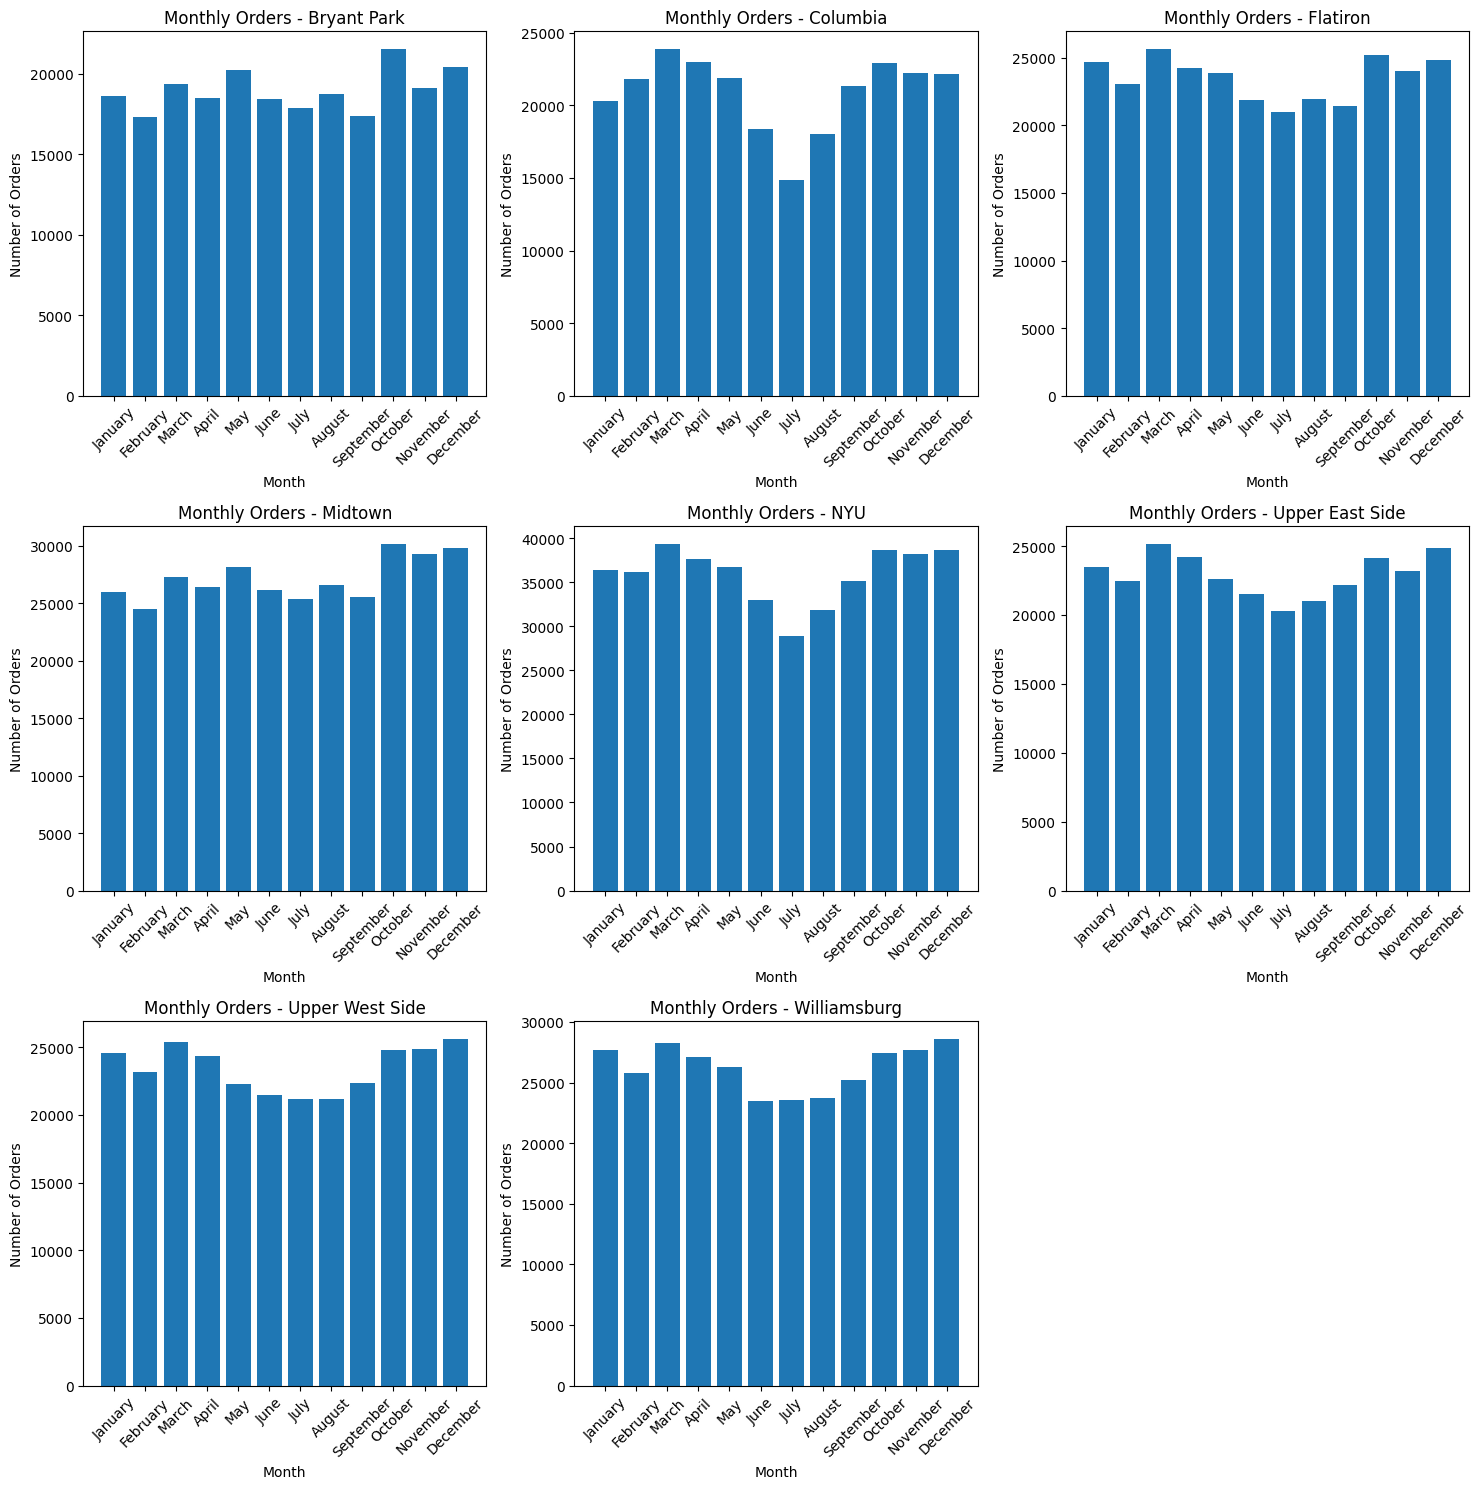

In [15]:
# Group the data by restaurant
restaurants = monthly_restaurant_map['RESTAURANT_NAME'].unique()

# Create subplots for each restaurant
num_restaurants = len(restaurants)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_restaurants + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.ravel()  # Flatten the axes array for easy iteration

for i, restaurant in enumerate(restaurants):
    restaurant_data = monthly_restaurant_map[monthly_restaurant_map['RESTAURANT_NAME'] == restaurant]

    # Sort by month name for correct order on the x-axis
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    restaurant_data['MONTH_NAME'] = pd.Categorical(restaurant_data['MONTH_NAME'],
                                                categories=month_order,
                                                ordered=True)
    restaurant_data = restaurant_data.sort_values('MONTH_NAME')

    axes[i].bar(restaurant_data['MONTH_NAME'], restaurant_data['NUM_ORDERS_monthly'])
    axes[i].set_title(f'Monthly Orders - {restaurant}')
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Number of Orders')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

    # Add a tight layout to prevent overlapping labels
    plt.tight_layout()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()


In [16]:
# Sort months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_restaurant_map['MONTH_NAME'] = pd.Categorical(
    monthly_restaurant_map['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

# Create animated map
fig = px.scatter_mapbox(
    monthly_restaurant_map.sort_values('MONTH_NAME'),
    lat='LAT',
    lon='LONG',
    size='NUM_ORDERS_total',
    color='NUM_ORDERS_monthly',
    animation_frame='MONTH_NAME',
    hover_name='RESTAURANT_NAME',
    hover_data={
        'LAT': False,
        'LONG': False,
        'NUM_ORDERS_monthly': ':.0f',  # Format as integer
        'NUM_ORDERS_total': ':.0f'     # Format as integer
    },
    labels={
        'MONTH_NAME': 'Month ',
        'NUM_ORDERS_monthly': 'Month Orders ',
        'NUM_ORDERS_total': 'Total Orders '
    },
    color_continuous_scale='Viridis',
    zoom=11.5,
    title='2018 Orders (by Restaurant) (Circle size = Total Annual Orders)'
)

# Update the map style and layout
fig.update_layout(
    # mapbox_style='open-street-map',
    mapbox_style='carto-positron',
    width=1200,
    height=800,
    margin={"r":0,"t":30,"l":0,"b":0}
)

# Show the animated map
fig.show()

##### Daily Average (by Restaurant)

##### Drinks & Cookies

### Items

#### Analysis

In [17]:
orders_item_restaurant = (df_orders_norm
                          .groupby(['DATE', 'RESTAURANT_NAME', 'ITEM_NAME'])['ORDER_ID']
                          .count()
                          .reset_index()
                          .rename(columns={'ORDER_ID': 'COUNT'}))

orders_item_restaurant

,DATE,RESTAURANT_NAME,ITEM_NAME,COUNT
0,2018-01-01,Bryant Park,Blistered Shishitos,49
1,2018-01-01,Bryant Park,Cashew Kale Caesar,74
2,2018-01-01,Bryant Park,Cauliflower with Garlic and Parmesan,87
3,2018-01-01,Bryant Park,Charred Broccoli with Lemon,71
4,2018-01-01,Bryant Park,Charred Chicken Marketbowl,110
...,...,...,...,...
44886,2018-12-31,Williamsburg,Jasper Hill Mac & Cheese,139
44887,2018-12-31,Williamsburg,Roasted Sweet Potatoes,394
44888,2018-12-31,Williamsburg,Roasted Wild Alaskan Salmon Marketbowl,46
44889,2018-12-31,Williamsburg,Snap Peas,394


In [18]:
# Extract month names and aggregate orders by month and restaurant
monthly_item_restaurant = (orders_item_restaurant
    .assign(MONTH_NAME=pd.to_datetime(orders_item_restaurant['DATE']).dt.strftime('%B')) # Convert 'DATE' to datetime before using .dt
    .groupby(['MONTH_NAME', 'RESTAURANT_NAME', 'ITEM_NAME'])
    .agg({'COUNT': 'sum'}) # Changed 'NUM_ORDERS' to 'COUNT'
    .reset_index())

# Sort months chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_item_restaurant['MONTH_NAME'] = pd.Categorical(
    monthly_item_restaurant['MONTH_NAME'],
    categories=month_order,
    ordered=True
)

monthly_item_restaurant = monthly_item_restaurant.sort_values(['MONTH_NAME', 'RESTAURANT_NAME']).reset_index(drop=True)

# Explicitly select the columns to display, including 'ITEM_NAME'
monthly_item_restaurant

,MONTH_NAME,RESTAURANT_NAME,ITEM_NAME,COUNT
0,January,Bryant Park,Blistered Shishitos,2751
1,January,Bryant Park,Cashew Kale Caesar,3226
2,January,Bryant Park,Cauliflower with Garlic and Parmesan,4895
3,January,Bryant Park,Charred Broccoli with Lemon,3628
4,January,Bryant Park,Charred Chicken Marketbowl,5425
...,...,...,...,...
1531,December,Williamsburg,Jasper Hill Mac & Cheese,4895
1532,December,Williamsburg,Roasted Sweet Potatoes,11881
1533,December,Williamsburg,Roasted Wild Alaskan Salmon Marketbowl,1316
1534,December,Williamsburg,Snap Peas,11693


In [19]:
avg_orders_by_restaurant_item = (monthly_item_restaurant
                                 .groupby(['RESTAURANT_NAME', 'ITEM_NAME'])['COUNT']
                                 .mean()
                                 .reset_index()
                                 .rename(columns={'COUNT': 'AVG_COUNT'})
                                 .sort_values(by=['AVG_COUNT'], ascending=True)
                                 .reset_index(drop=True)
                                )
avg_orders_by_restaurant_item

,RESTAURANT_NAME,ITEM_NAME,AVG_COUNT
0,Columbia,Roasted Wild Alaskan Salmon Marketbowl,969.833333
1,Bryant Park,Roasted Wild Alaskan Salmon Marketbowl,975.416667
2,Upper East Side,Roasted Wild Alaskan Salmon Marketbowl,1093.416667
3,Upper West Side,Roasted Wild Alaskan Salmon Marketbowl,1124.250000
4,Flatiron,Roasted Wild Alaskan Salmon Marketbowl,1139.000000
...,...,...,...
123,Midtown,Roasted Sweet Potatoes,11237.083333
124,NYU,Farro with Summer Vegetables,12766.916667
125,NYU,Farm Greens with Mint,13849.166667
126,NYU,Snap Peas,14868.083333


In [20]:
orders_item_restaurant_total = (monthly_item_restaurant
                                .groupby(['RESTAURANT_NAME', 'ITEM_NAME'])['COUNT']
                                .sum()
                                .reset_index())
orders_item_restaurant_total

,RESTAURANT_NAME,ITEM_NAME,COUNT
0,Bryant Park,Blistered Shishitos,33809
1,Bryant Park,Cashew Kale Caesar,39478
2,Bryant Park,Cauliflower with Garlic and Parmesan,59590
3,Bryant Park,Charred Broccoli with Lemon,44160
4,Bryant Park,Charred Chicken Marketbowl,65959
...,...,...,...
123,Williamsburg,Jasper Hill Mac & Cheese,53131
124,Williamsburg,Roasted Sweet Potatoes,131042
125,Williamsburg,Roasted Wild Alaskan Salmon Marketbowl,14835
126,Williamsburg,Snap Peas,130071


In [21]:
monthly_item_counts = (monthly_item_restaurant
                       .groupby(['MONTH_NAME', 'ITEM_NAME'])['COUNT']
                       .sum()
                       .reset_index())

monthly_item_counts['MONTH_NAME'] = pd.Categorical(monthly_item_counts['MONTH_NAME'],
                                                 categories=month_order,
                                                 ordered=True)

monthly_item_counts

,MONTH_NAME,ITEM_NAME,COUNT
0,January,Blistered Shishitos,29990
1,January,Cashew Kale Caesar,34822
2,January,Cauliflower with Garlic and Parmesan,53195
3,January,Charred Broccoli with Lemon,39366
4,January,Charred Chicken Marketbowl,58751
...,...,...,...
187,December,Jasper Hill Mac & Cheese,36432
188,December,Roasted Sweet Potatoes,89639
189,December,Roasted Wild Alaskan Salmon Marketbowl,10162
190,December,Snap Peas,89054


In [22]:
item_counts = (monthly_item_restaurant
               .groupby(['ITEM_NAME'])['COUNT']
               .sum()
               .reset_index()
               .sort_values(by='COUNT', ascending=True)
               .reset_index(drop=True))
item_counts

,ITEM_NAME,COUNT
0,Roasted Wild Alaskan Salmon Marketbowl,114447
1,Grilled Organic Tofu Marketbowl,183158
2,Green Goddess Beans with Sesame,309898
3,Blistered Shishitos,353950
4,Jasper Hill Mac & Cheese,404399
5,Cashew Kale Caesar,412992
6,Charred Broccoli with Lemon,460190
7,Classic Brown Rice,508513
8,Spicy Meatballs Marketbowl,590685
9,Cauliflower with Garlic and Parmesan,628136


#### Visualizations

##### Total Items Sales

In [23]:
# Create the horizontal bar chart using Plotly
fig = px.bar(
    item_counts,
    y='ITEM_NAME',
    x='COUNT',
    title='Total Items Sold in 2018',
    orientation='h'
)

# Update layout for better readability and format axis
fig.update_layout(
    yaxis_title='Item Name',
    xaxis_title='Total Count',
    margin=dict(l=200),
    width=1200,
    height=800,
    xaxis=dict(
        tickformat=',.0f',  # Format numbers with commas
    )
)

fig.show()

##### Monthly Item Sales

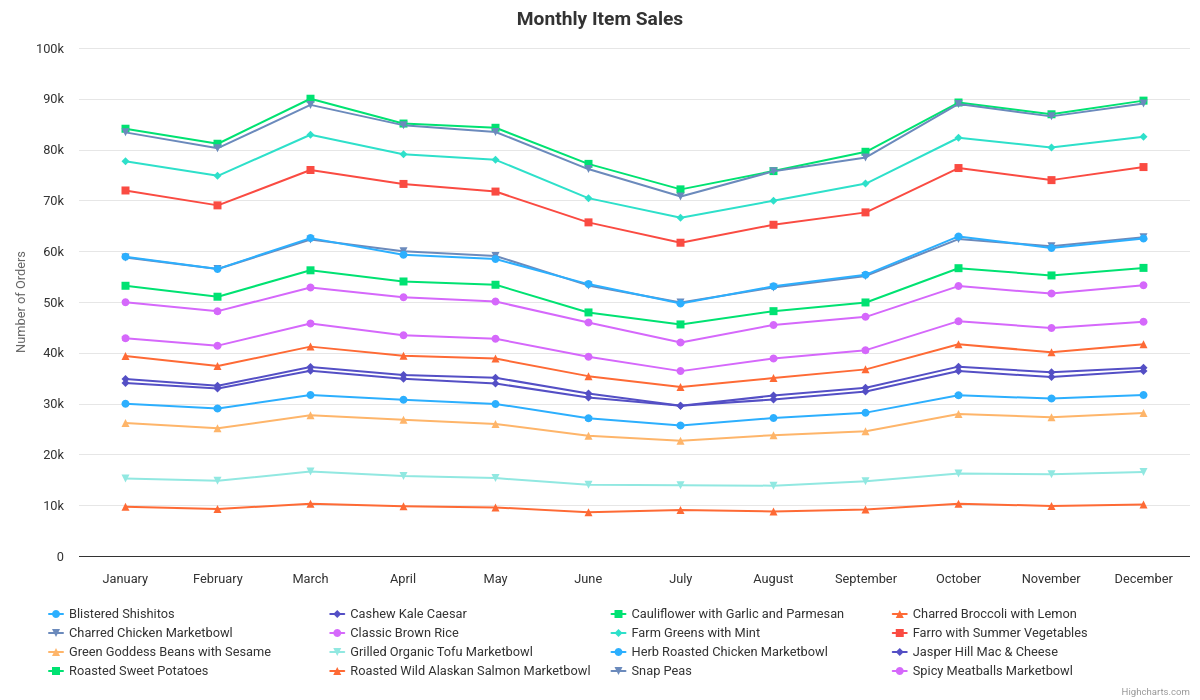

In [24]:
# Create a list to hold the series data
series_data = []

# Get unique ITEM_NAMEs
unique_items = monthly_item_counts['ITEM_NAME'].unique()

# Create a series for each ITEM_NAME
for item in unique_items:
    item_data = monthly_item_counts[monthly_item_counts['ITEM_NAME'] == item]
    series_data.append({
        'name': item,  # Use ITEM_NAME as the series name
        'data': item_data['COUNT'].tolist(),  # Data for this item
        'type': 'line'  # Specify chart type as line
    })

# Define chart options with the series data
options = {
    'title': {'text': 'Monthly Item Sales'},
    'xAxis': {'categories': month_order},
    'yAxis': {'title': {'text': 'Number of Orders'}},
    'series': series_data,  # Use the generated series data
    'chart': {
        'height': 700,  # Set the desired height in pixels
        'width': 1200  # Set the desired width in pixels
    }
}

# Create the chart
chart = Chart(options=options)
chart  # Display the chart data

##### Monthly Item Sales (by Restaturant)

##### Monthly Average Item Sales (by Restaurant)

In [25]:
colors = px.colors.qualitative.Dark2  # Example: Using 'Dark2'

# Create the horizontal bar chart
fig = px.bar(
    avg_orders_by_restaurant_item,
    y='ITEM_NAME',
    x='AVG_COUNT',
    color='RESTAURANT_NAME',
    orientation='h',
    title='Average Monthly Orders (by Item and Restaurant)',
    labels={
        'ITEM_NAME': 'Item Name',
        'AVG_COUNT': 'Monthly Average Orders',
        'RESTAURANT_NAME': 'Restaurant'
    },
    height=800,
    color_discrete_sequence=colors  # Add custom colors
)

# Update layout for better readability
fig.update_layout(
    showlegend=True,
    legend_title='Restaurant',
    barmode='group',
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Monthly Average Orders',
    yaxis_title='Item Name',
    margin=dict(l=200),
    # Update font sizes
    font=dict(size=12),
    title_font_size=20,
    xaxis=dict(
        tickformat=',.0f'  # Format numbers with commas
    )
)

# Show the plot
fig.show()

### Order Type

#### Order Type (Total)

In [26]:
order_type_count = (df_orders
                    .groupby(['DATE', 'TYPE'])['TYPE']
                    .count()
                    .reset_index(name='COUNT'))
order_type_count

,DATE,TYPE,COUNT
0,2018-01-01,DELIVERY,715
1,2018-01-01,IN_STORE,2882
2,2018-01-01,PICKUP,650
3,2018-01-02,DELIVERY,791
4,2018-01-02,IN_STORE,4464
...,...,...,...
1090,2018-12-30,IN_STORE,3615
1091,2018-12-30,PICKUP,802
1092,2018-12-31,DELIVERY,1012
1093,2018-12-31,IN_STORE,4986


#### Order Type (Drinks & Cookies)

In [27]:
order_type_drinks = (df_orders
                     .groupby(['DATE', 'TYPE'])[['DRINKS', 'COOKIES']]
                     .sum()
                     .sort_values(by=['DATE', 'TYPE'], ascending=True)
                     .reset_index())

order_type_drinks

,DATE,TYPE,DRINKS,COOKIES
0,2018-01-01,DELIVERY,45.0,158.0
1,2018-01-01,IN_STORE,178.0,720.0
2,2018-01-01,PICKUP,46.0,158.0
3,2018-01-02,DELIVERY,55.0,218.0
4,2018-01-02,IN_STORE,340.0,1083.0
...,...,...,...,...
1090,2018-12-30,IN_STORE,248.0,920.0
1091,2018-12-30,PICKUP,50.0,179.0
1092,2018-12-31,DELIVERY,52.0,246.0
1093,2018-12-31,IN_STORE,366.0,1150.0


#### Order Type (by Restaurant)

In [28]:
order_type_restaurant = (df_orders
                         .groupby(['DATE', 'RESTAURANT_NAME', 'TYPE'])['TYPE']
                         .count()
                         .reset_index(name='COUNT'))

order_type_restaurant

,DATE,RESTAURANT_NAME,TYPE,COUNT
0,2018-01-01,Bryant Park,IN_STORE,282
1,2018-01-01,Bryant Park,PICKUP,76
2,2018-01-01,Columbia,DELIVERY,82
3,2018-01-01,Columbia,IN_STORE,324
4,2018-01-01,Columbia,PICKUP,80
...,...,...,...,...
8207,2018-12-31,Upper West Side,IN_STORE,488
8208,2018-12-31,Upper West Side,PICKUP,147
8209,2018-12-31,Williamsburg,DELIVERY,105
8210,2018-12-31,Williamsburg,IN_STORE,656


#### Order Type (Daily Average by Restaurant)

In [29]:
order_type_restaurant_daily_avg = (order_type_restaurant
                                   .groupby(['RESTAURANT_NAME', 'TYPE'])['COUNT']
                                   .mean()
                                   .reset_index()
                                   .sort_values(['RESTAURANT_NAME', 'COUNT'], ascending=[True, False])
                                   .rename(columns={'COUNT': 'DAILY_AVG'}).reset_index(drop=True))

order_type_restaurant_daily_avg

,RESTAURANT_NAME,TYPE,DAILY_AVG
0,Bryant Park,IN_STORE,626.310345
1,Bryant Park,PICKUP,147.222222
2,Bryant Park,DELIVERY,85.000000
3,Columbia,IN_STORE,477.468493
4,Columbia,PICKUP,112.364384
5,Columbia,DELIVERY,66.073973
6,Flatiron,IN_STORE,534.545205
7,Flatiron,PICKUP,126.704110
8,Flatiron,DELIVERY,75.487671
9,Midtown,IN_STORE,638.339726


#### Order Type (by Item)

In [30]:
order_type_restaurant_item = (df_orders_norm
                              .groupby(['DATE', 'ITEM_NAME', 'TYPE'])['TYPE']
                              .count()
                              .reset_index(name='COUNT'))

order_type_restaurant_item

,DATE,ITEM_NAME,TYPE,COUNT
0,2018-01-01,Blistered Shishitos,DELIVERY,121
1,2018-01-01,Blistered Shishitos,IN_STORE,476
2,2018-01-01,Blistered Shishitos,PICKUP,99
3,2018-01-01,Cashew Kale Caesar,DELIVERY,125
4,2018-01-01,Cashew Kale Caesar,IN_STORE,485
...,...,...,...,...
17515,2018-12-31,Snap Peas,IN_STORE,2250
17516,2018-12-31,Snap Peas,PICKUP,500
17517,2018-12-31,Spicy Meatballs Marketbowl,DELIVERY,260
17518,2018-12-31,Spicy Meatballs Marketbowl,IN_STORE,1364


#### Order Type (Daily Average by Item)

In [31]:
order_type_item_daily_avg = (order_type_restaurant_item
                             .groupby(['ITEM_NAME', 'TYPE'])['COUNT']
                             .mean()
                             .reset_index()
                             .sort_values(['ITEM_NAME', 'COUNT'], ascending=[True, False])
                             .rename(columns={'COUNT': 'DAILY_AVG'}))

order_type_item_daily_avg

,ITEM_NAME,TYPE,DAILY_AVG
1,Blistered Shishitos,IN_STORE,695.101370
2,Blistered Shishitos,PICKUP,163.715068
0,Blistered Shishitos,DELIVERY,110.909589
4,Cashew Kale Caesar,IN_STORE,811.578082
5,Cashew Kale Caesar,PICKUP,190.432877
3,Cashew Kale Caesar,DELIVERY,129.473973
7,Cauliflower with Garlic and Parmesan,IN_STORE,1232.967123
8,Cauliflower with Garlic and Parmesan,PICKUP,290.657534
6,Cauliflower with Garlic and Parmesan,DELIVERY,197.295890
10,Charred Broccoli with Lemon,IN_STORE,903.194521


## **Insights & Recommendations**

### Q1: What Type of Restaurant Should the New Restaurant it Be?
- In-Store
- Delivery

### Q2: Where should the New Restaurant Be Located?


### Q3: What Should be Included in The Menu of the New Restaurant?

### Additional Research